In [1]:
#!/usr/bin/env python3

# Building a preliminary spectrum.  

* Add instruction here or in readme for how to set up your own analysis pipeline.

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import uproot4
from lmfit import minimize, Parameters, fit_report

# Jupyter Lab imports.
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed

# Path to local imports.
sys.path.append("/home/drew/He6CRES/rocks_analysis_pipeline/")
from results import ExperimentResults
from rocks_utility import he6cres_db_query

# Path to local imports.
sys.path.append("/home/drew/He6CRES/he6-cres-spec-sims/")

# Local imports.
import he6_cres_spec_sims.spec_tools.spec_calc.spec_calc as sc
import he6_cres_spec_sims.experiment as exp

# Local imports for plotting ratios and such. 
import analysis_functions.ratio_experiment as re
import analysis_functions.ratio_prediction as rp

### 1a: Grab the experiment directory and root files for both he and ne. 

In [4]:
local_dir = "/media/drew/T7 Shield/rocks_analysis/saved_experiments"
experiment_name = "he6_full_0"
analysis_id = 1
include_root_files = False
max_root_files_to_grab = 0
rebuild_experiment_dir = False

In [5]:
he = ExperimentResults(local_dir = local_dir, 
                                     experiment_name = experiment_name, 
                                     analysis_id = analysis_id, 
                                     include_root_files = include_root_files,
                                     max_root_files_to_grab = max_root_files_to_grab,
                                     rebuild_experiment_dir=rebuild_experiment_dir,
                                    )

Keeping existing experiment directory.




In [6]:
local_dir = "/media/drew/T7 Shield/rocks_analysis/saved_experiments"
experiment_name = "ne19_full_0"
analysis_id = 2
include_root_files = False
max_root_files_to_grab = 0
rebuild_experiment_dir = False

In [7]:
ne = ExperimentResults(local_dir = local_dir, 
                                     experiment_name = experiment_name, 
                                     analysis_id = analysis_id, 
                                     include_root_files = include_root_files,
                                     max_root_files_to_grab = max_root_files_to_grab,
                                     rebuild_experiment_dir=rebuild_experiment_dir,
                                    )

Keeping existing experiment directory.




In [8]:
he.root_files = he.root_files[~he.root_files.run_id.isin([377,380, 381])]
he.events = he.events[~he.events.run_id.isin([377,380, 381])]
he.tracks = he.tracks[~he.tracks.run_id.isin([377,380, 381])]

ne.root_files = ne.root_files[~ne.root_files.run_id.isin([522])]
ne.events = ne.events[~ne.events.run_id.isin([522])]
ne.tracks = ne.tracks[~ne.tracks.run_id.isin([522])]

## Testing new normalization scheme: (02/07/23)


In [9]:
def plot_experimental_ratio(ratio_exp, ax ): 
    
    ax.errorbar(ratio_exp.index, ratio_exp.Ratio, yerr = ratio_exp["sRatio"], label = f"Ratio, experiment", marker='o', ms=4)

    return None

def plot_predicted_ratio(ratio_pre, ax ): 

    ax.plot(ratio_pre.index, ratio_pre.Ratio,  label = f"Ratio, predicted", marker='o', ms=6)
  
    return None

In [10]:
cuts = {"EventStartFreq": (100*1e6, 1200e6), "EventNBins": (0, np.inf)}
ne_spectrum = re.build_spectrum(ne.events, ne.root_files, cuts)
he_spectrum = re.build_spectrum(he.events, he.root_files, cuts)

display(ne_spectrum, he_spectrum)

,set_field,event_count,tot_monitor_rate,seconds_of_data,normed_tot_monitor_rate,mon_adjusted_count,mon_adjusted_count_uncert
0,0.75,110.0,5727615.45,500,1.035126,106.267280,10.488088
1,1.00,1408.0,6987527.08,699,1.262824,1114.961529,37.523326
2,1.25,2100.0,5567364.13,498,1.006164,2087.134319,45.825757
3,1.50,2721.0,4870106.25,497,0.880152,3091.511293,52.163205
4,1.75,3647.0,5097006.79,498,0.921159,3959.143862,60.390397
5,2.00,4377.0,5232970.77,496,0.945731,4628.166446,66.158900
6,2.25,3712.0,4301442.15,399,0.777380,4775.013599,60.926185
7,2.50,4110.0,5243144.62,500,0.947570,4337.412399,64.109282
8,2.75,3196.0,5492984.01,498,0.992722,3219.431340,56.533176
9,3.00,1551.0,5826929.03,500,1.053074,1472.830608,39.382737


,set_field,event_count,tot_monitor_rate,seconds_of_data,normed_tot_monitor_rate,mon_adjusted_count,mon_adjusted_count_uncert
0,0.75,62.0,10431713.20,199,0.449832,137.829317,7.874008
1,1.00,683.0,27086019.77,500,1.167991,584.764587,26.134269
2,1.25,1072.0,25103944.73,497,1.082521,990.280819,32.741411
3,1.50,1736.0,25077517.76,496,1.081382,1605.353673,41.665333
4,1.75,2698.0,26267465.36,598,1.132694,2381.931835,51.942276
5,2.00,3717.0,25732733.17,498,1.109636,3349.748461,60.967204
6,2.25,5242.0,25725930.05,500,1.109342,4725.322825,72.401657
7,2.50,7154.0,25977301.17,500,1.120182,6386.463850,84.581322
8,2.75,8607.0,25609743.42,500,1.104332,7793.851513,92.773919
9,3.00,6079.0,16074591.00,300,0.693161,8769.963051,77.967942


-9
3
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 14
    # data points      = 11
    # variables        = 1
    chi-square         = 573.544948
    reduced chi-square = 57.3544948
    Akaike info crit   = 45.4933514
    Bayesian info crit = 45.8912467
[[Variables]]
    C:  0.35830943 +/- 0.02313661 (6.46%) (init = 1)


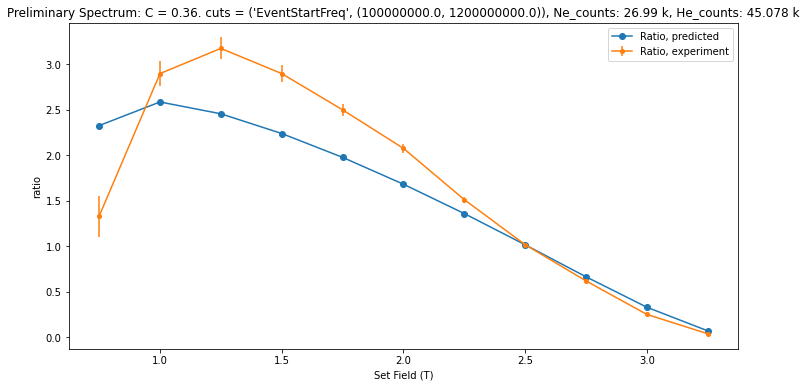

-9
3
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12
    # data points      = 11
    # variables        = 1
    chi-square         = 83.6182228
    reduced chi-square = 8.36182228
    Akaike info crit   = 24.3120282
    Bayesian info crit = 24.7099235
[[Variables]]
    C:  0.30441398 +/- 0.00917220 (3.01%) (init = 1)


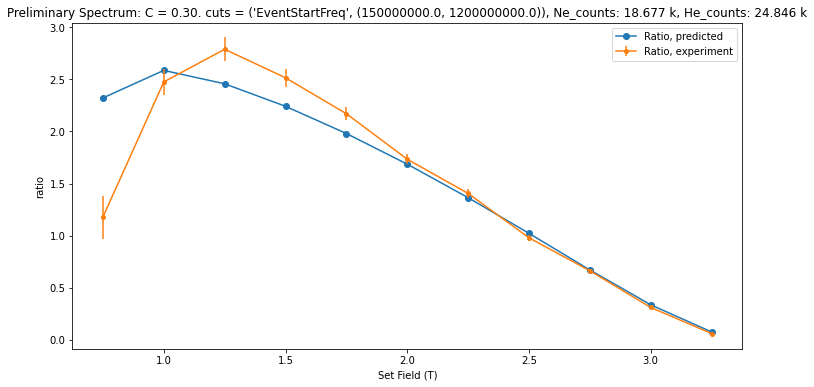

-9
3
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12
    # data points      = 11
    # variables        = 1
    chi-square         = 75.0659098
    reduced chi-square = 7.50659098
    Akaike info crit   = 23.1251838
    Bayesian info crit = 23.5230790
[[Variables]]
    C:  0.30481399 +/- 0.00894939 (2.94%) (init = 1)


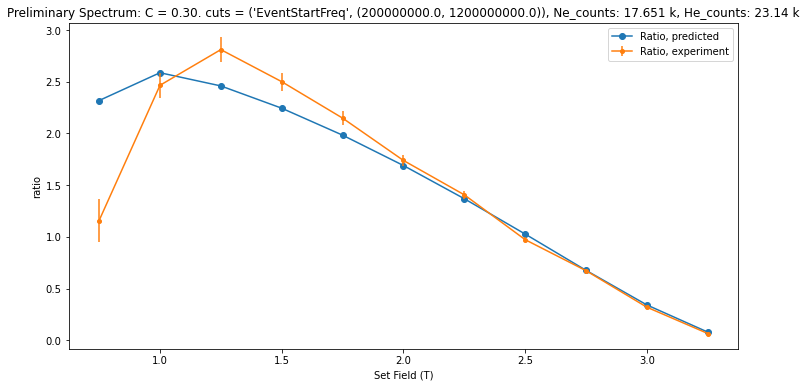

-9
3
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12
    # data points      = 11
    # variables        = 1
    chi-square         = 59.4562128
    reduced chi-square = 5.94562128
    Akaike info crit   = 20.5607934
    Bayesian info crit = 20.9586886
[[Variables]]
    C:  0.30081508 +/- 0.00816403 (2.71%) (init = 1)


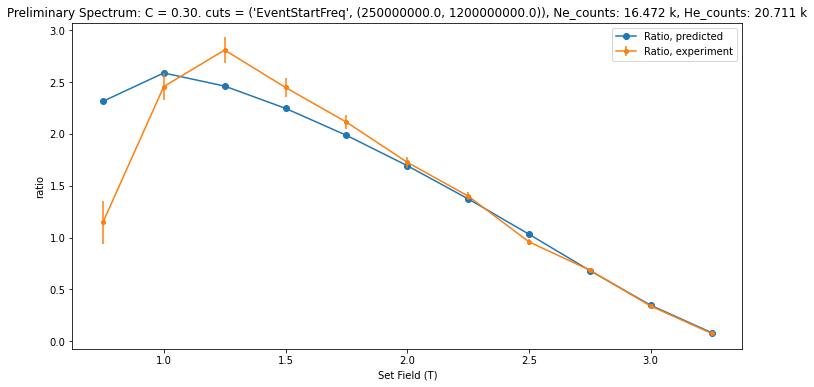

-9
3
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12
    # data points      = 11
    # variables        = 1
    chi-square         = 66.4900607
    reduced chi-square = 6.64900607
    Akaike info crit   = 21.7907292
    Bayesian info crit = 22.1886245
[[Variables]]
    C:  0.30003831 +/- 0.00896709 (2.99%) (init = 1)


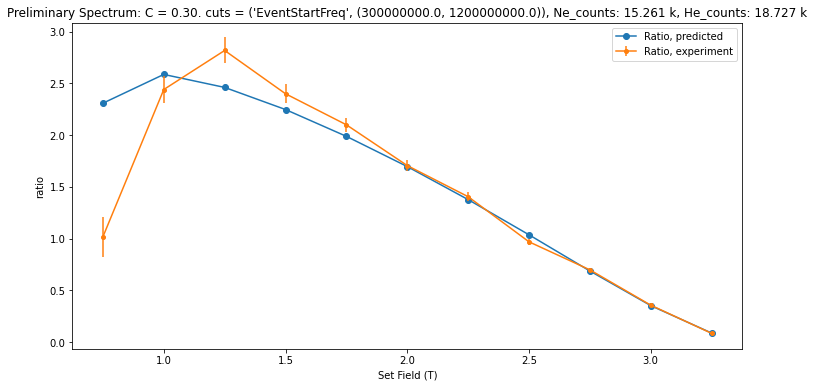

-9
3
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12
    # data points      = 11
    # variables        = 1
    chi-square         = 80.9098451
    reduced chi-square = 8.09098451
    Akaike info crit   = 23.9498426
    Bayesian info crit = 24.3477379
[[Variables]]
    C:  0.30269913 +/- 0.01031488 (3.41%) (init = 1)


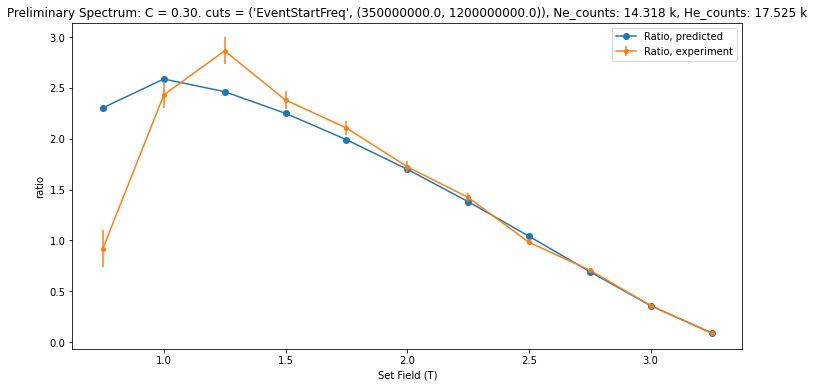

-9
3
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12
    # data points      = 11
    # variables        = 1
    chi-square         = 63.9893939
    reduced chi-square = 6.39893939
    Akaike info crit   = 21.3690428
    Bayesian info crit = 21.7669381
[[Variables]]
    C:  0.30275534 +/- 0.00944441 (3.12%) (init = 1)


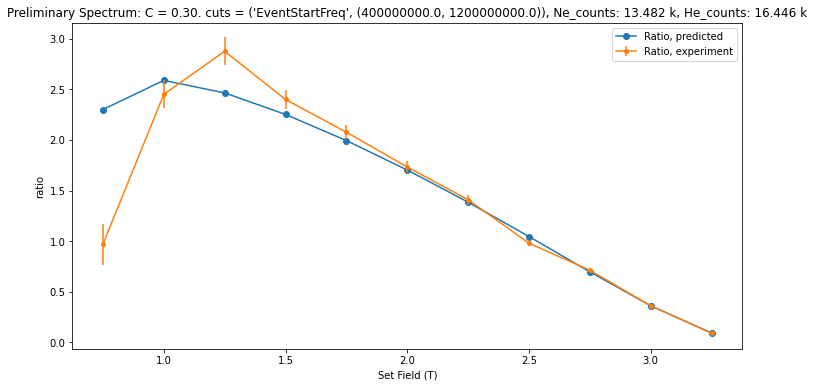

-9
3
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12
    # data points      = 11
    # variables        = 1
    chi-square         = 55.4211577
    reduced chi-square = 5.54211577
    Akaike info crit   = 19.7877277
    Bayesian info crit = 20.1856230
[[Variables]]
    C:  0.29926556 +/- 0.00901397 (3.01%) (init = 1)


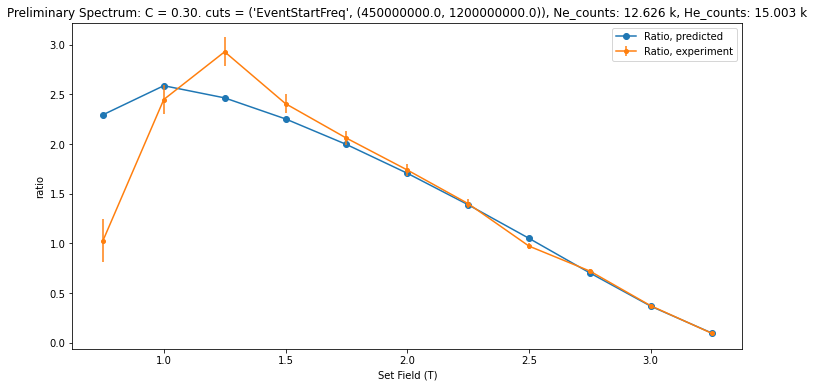

In [11]:
%matplotlib inline
# Step 0: Get the ne and he specrum dfs: 
cuts = {"EventStartFreq": (100*1e6, 1200e6), "EventNBins": (100, np.inf)}
set_fields = np.arange(.75,3.5,.25)


for i in range(8):
    
    cuts = {"EventStartFreq": ((100+i*50)*1e6, (1200)*1e6), "EventNBins": (0, np.inf), "EventTimeLength": (0.000, np.inf), 
       "EventStartTime":(0.001,np.inf), 
       "EventTimeIntc": (-1.5, np.inf)}
    
    # Make the experimental spectra
    ne_spectrum = re.build_spectrum(ne.events, ne.root_files, cuts)
    he_spectrum = re.build_spectrum(he.events, he.root_files, cuts)
    # Make the experimental ratio with new normalization scheme. 
    ratio_exp = re.build_ratio_altnorm(ne_spectrum, he_spectrum)
    
    # Make the predicted ratio.
    freq_BW = np.array([17.9e9 + cuts["EventStartFreq"][0] ,  19.1e9 -  cuts["EventStartFreq"][1]])
    freq_BWs = np.tile(freq_BW, (len(set_fields), 1))
    ratio_pred = rp.AUC_expectation(set_fields, freq_BWs, b = 0, plot = False)

    # Only take the fields you want: 
    ratio_pred = ratio_pred[ratio_pred.index.isin(set_fields)]
    ratio_exp = ratio_exp[ratio_exp.index.isin(set_fields)]

    # Fit to the free normalization parameter. 
    def objfunc_chisq(C, ratio_pred, ratio_exp ): 

        # I think the lmfit does the least squares on these values for you but double check. 
        chisq_gauss = (ratio_pred["Ratio"] - C*ratio_exp["Ratio"])/ (C*ratio_exp["sRatio"])
        return chisq_gauss

    my_pars = Parameters()
    my_pars.add('C', value=1, min=0, max = 1000, vary =True)

    result = minimize(objfunc_chisq, my_pars, args = (ratio_pred, ratio_exp))

    # Print fit report
    print(fit_report(result))


    C = result.params["C"].value
    ratio_exp["Ratio"] = C*ratio_exp["Ratio"]
    ratio_exp["sRatio"] = C*ratio_exp["sRatio"]

    fig0, ax0 = plt.subplots(figsize=(12,6))
    
    plot_predicted_ratio(ratio_pred, ax0 )
    plot_experimental_ratio(ratio_exp, ax0 )

    ax0.set_ylabel('ratio')
    ax0.set_xlabel('Set Field (T)')
    ax0.set_title(f"Preliminary Spectrum: C = {C:.2f}. cuts = {list(cuts.items())[0]}, Ne_counts: {ne_spectrum.event_count.sum()/1000} k, He_counts: {he_spectrum.event_count.sum()/1000} k")
    ax0.legend()
    plt.show()

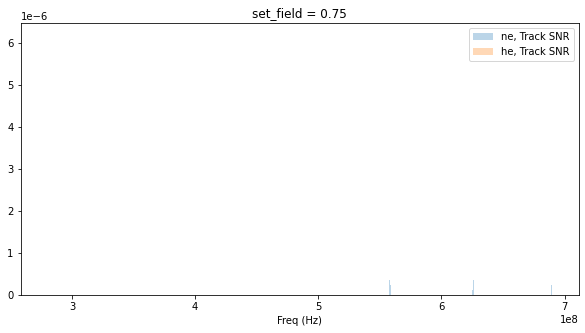

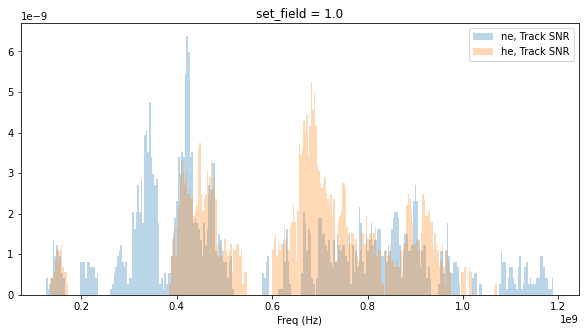

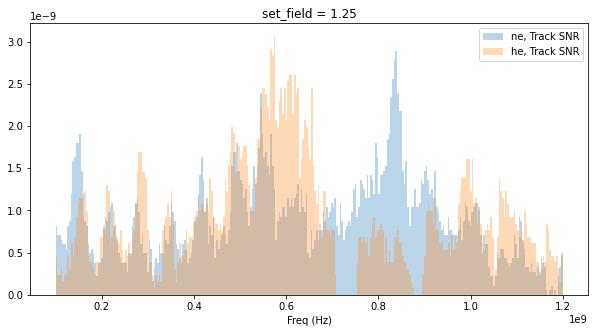

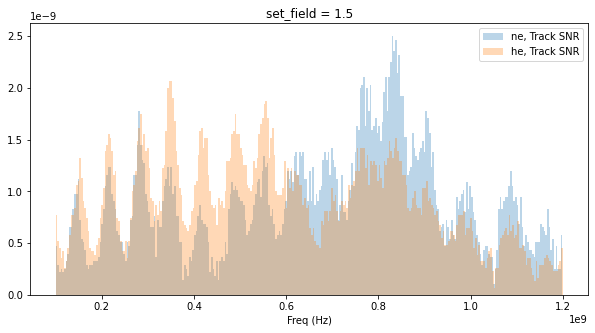

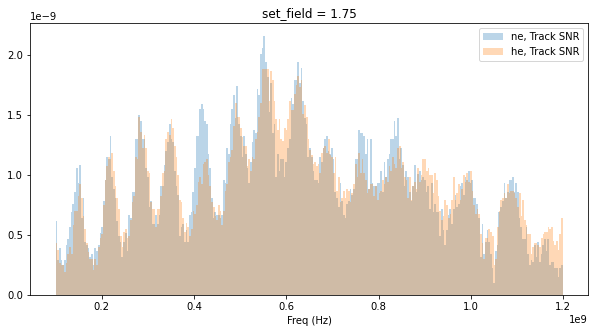

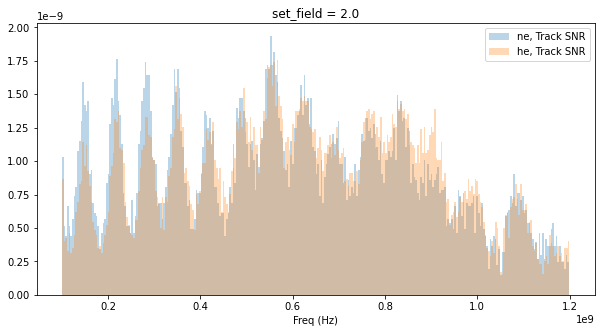

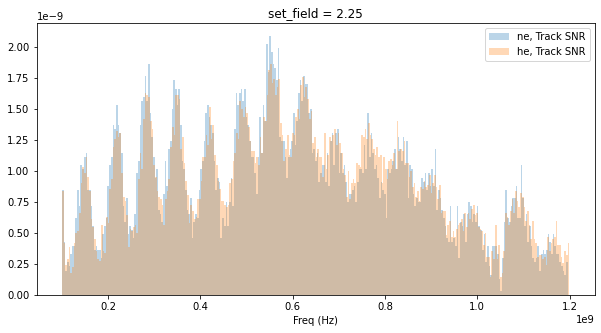

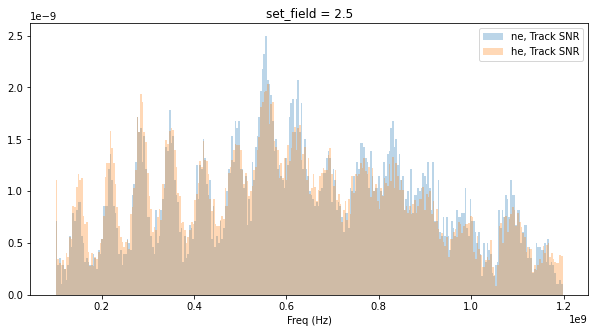

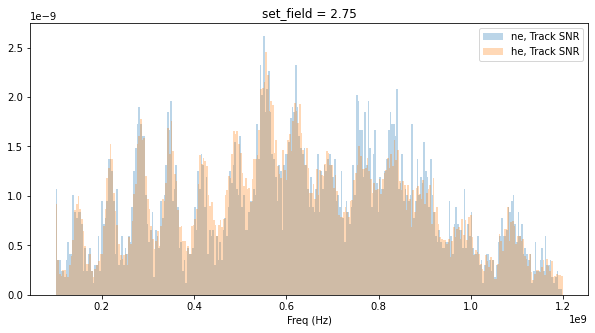

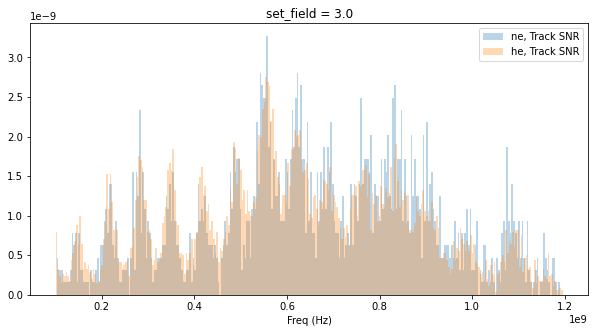

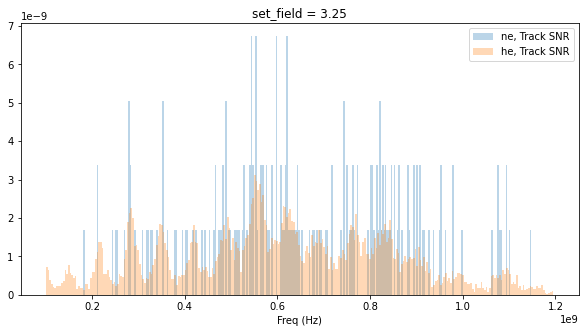

In [11]:

experiment = {"ne": ne, "he": he}
cut = 10
set_fields = np.arange(.75,3.5,.25)
# fig1, ax1 = plt.subplots(figsize=(10,5))
# fig2, ax2 = plt.subplots(figsize=(10,5))
for set_field in set_fields:
    fig0, ax0 = plt.subplots(figsize=(10,5))
    for i,isotope in enumerate(experiment.keys()):
        
            df = experiment[isotope].tracks
            df = df[df.set_field == set_field]
            MeanTrackSNR_normed = df.MeanTrackSNR 
            MeanNoise = df.TotalPower / df.TotalTrackSNR
            MeanNoise_normed = MeanNoise 
            # Scatter Plots
            ax0.hist(
                df.StartFrequency,
                label = f"{isotope}, Track SNR",
                bins = 300,
                alpha = .3, density = True
            )

    ax0.legend()
    plt.title(f"set_field = {set_field}")
    ax0.set_xlabel("Freq (Hz)")
    # ax1.set_xlabel("Freq (Hz)")
    plt.show()

## Look at average length 

Notes: 

* There are discrepancies down at high fields without a start freq cut.
* Something to try: Cut the longest tracks for he such that these plots match up perfectly? Could this solve this? 
* AFTER breakfast: 
    * try to write a function that cuts the length based on the field to create the same average length as a function of field for ne and he. 
    
* Try clustering with some epsilon for low fields and then look again at the below plots. 

In [118]:
ne.events.columns

Index(['run_id', 'file_id', 'EventID', 'EventStartTime', 'EventEndTime',
       'EventStartFreq', 'EventEndFreq', 'EventTimeLength', 'EventFreqLength',
       'EventTrackCoverage', 'EventMeanSNR', 'EventSlope', 'EventNBins',
       'EventTrackTot', 'EventFreqIntc', 'EventTimeIntc', 'field', 'set_field',
       'monitor_rate'],
      dtype='object')

## Anomoly detection. Get on this. Make this into a reusable function for diagnosis. 

['10_ne', '50_ne', '90_ne'] ['10_he', '50_he', '90_he'] ['q10', 'q50', 'q90']


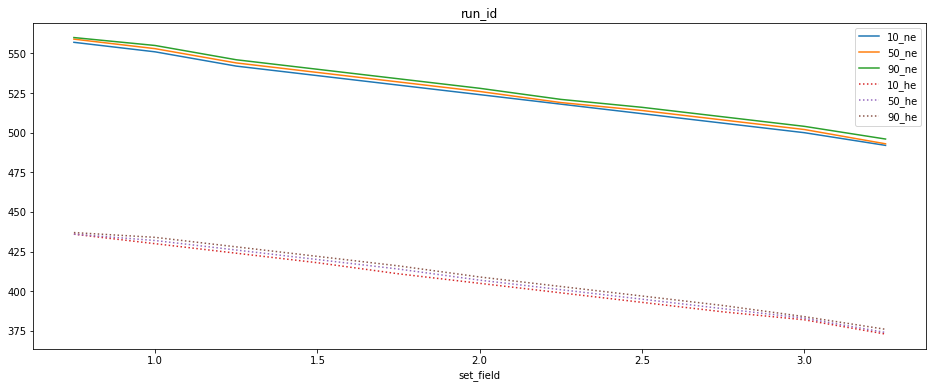

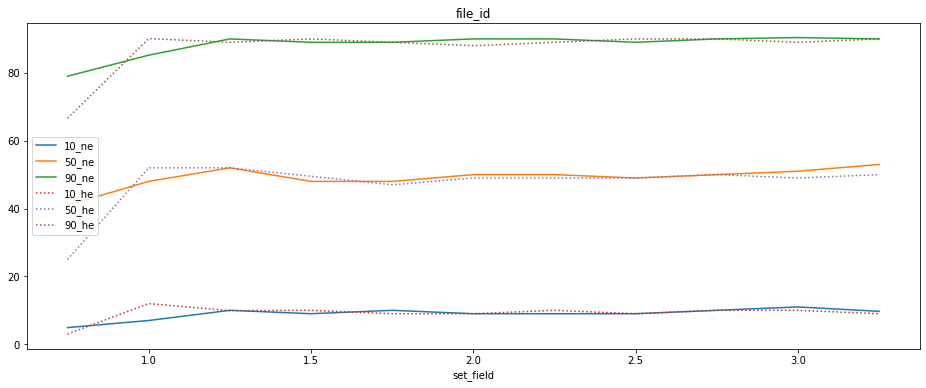

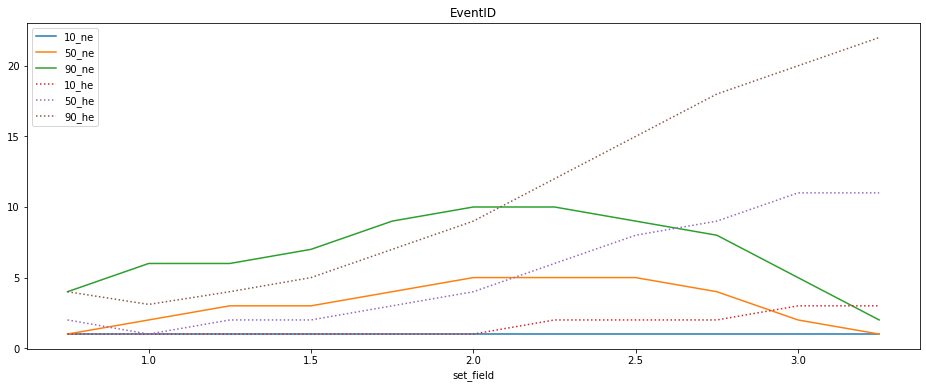

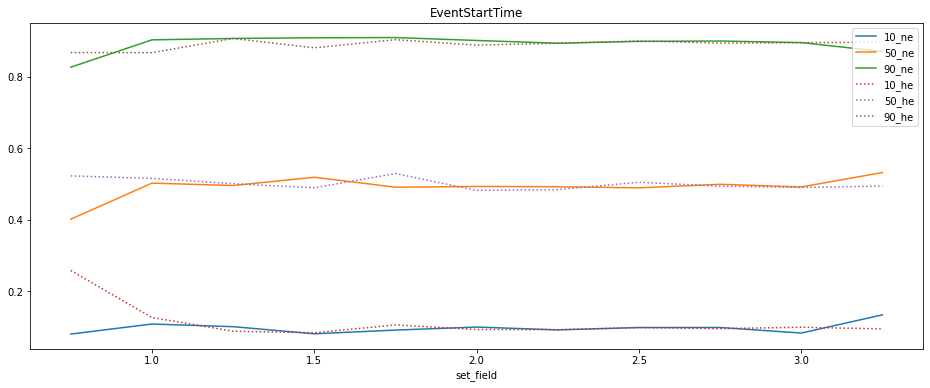

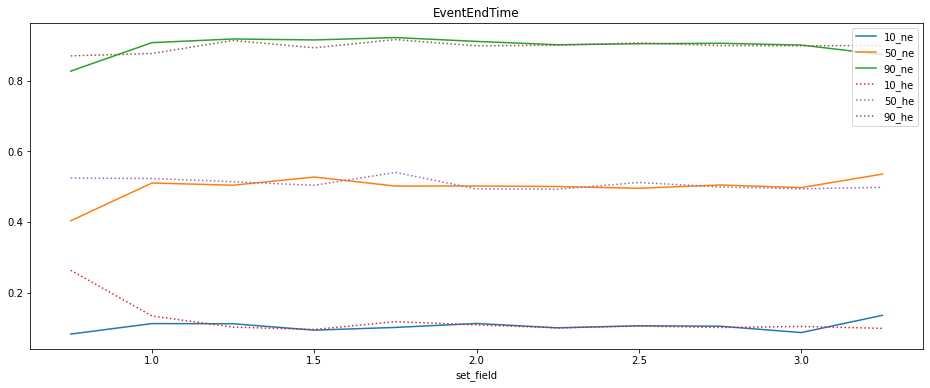

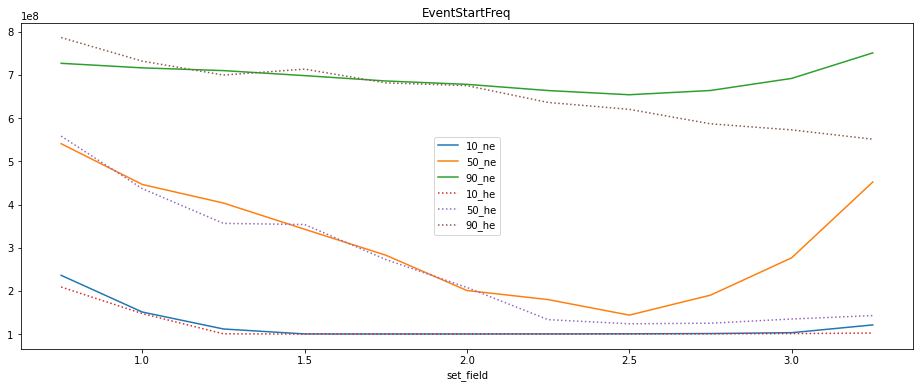

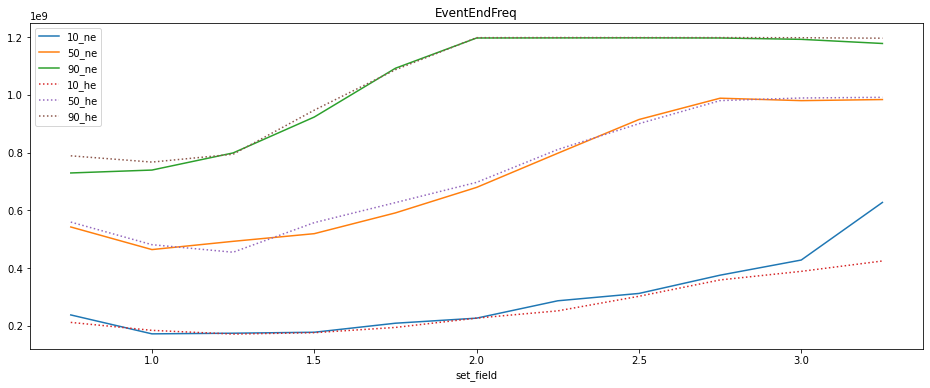

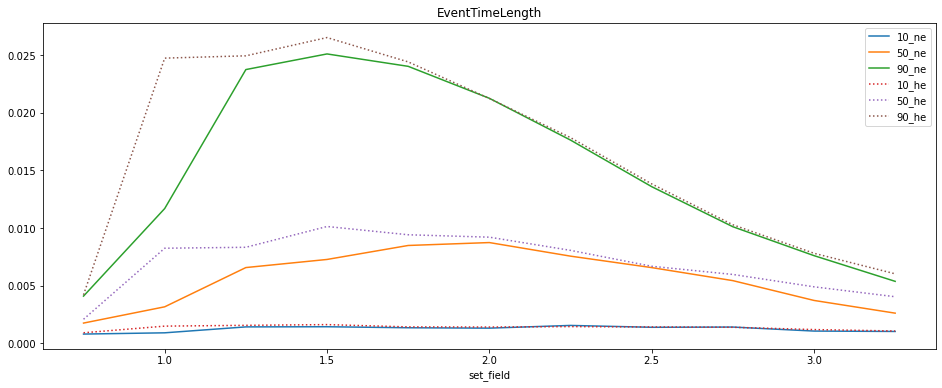

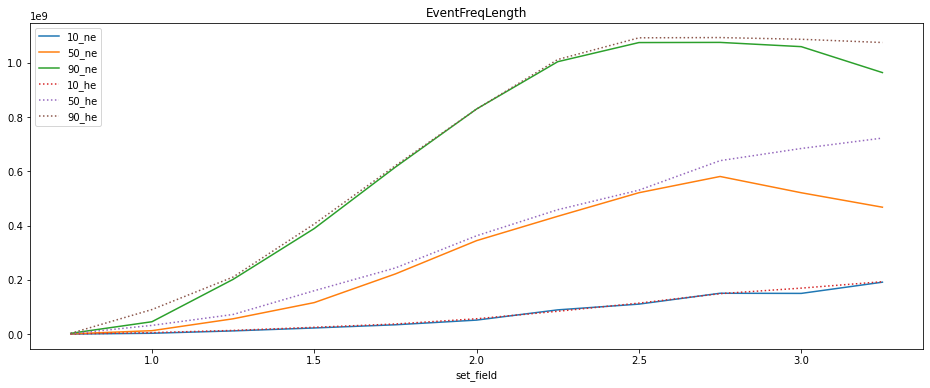

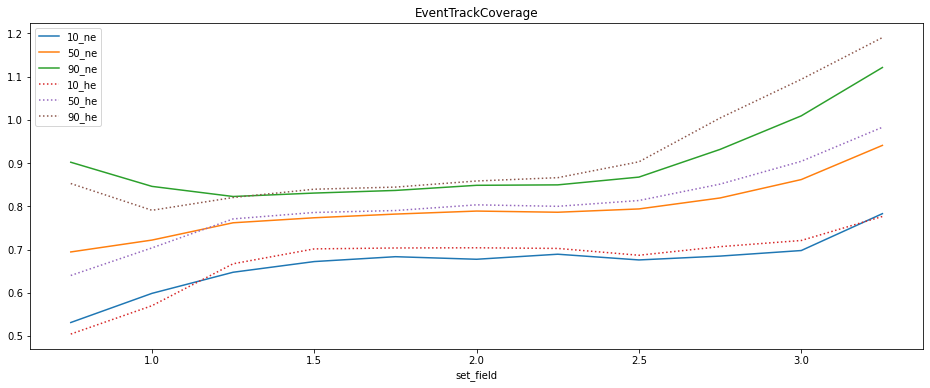

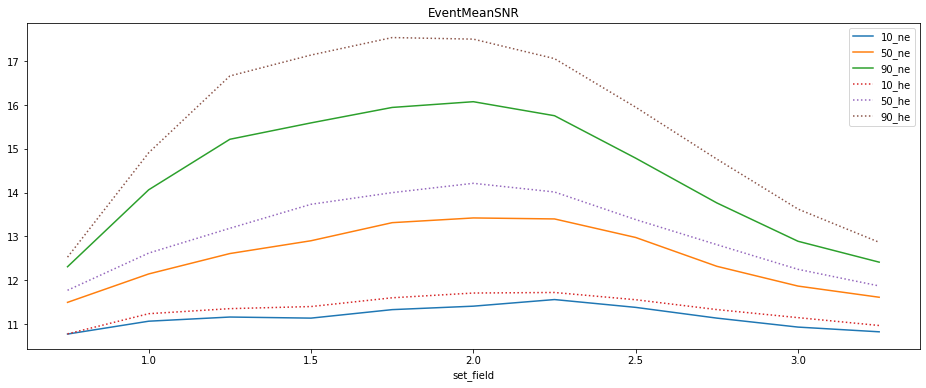

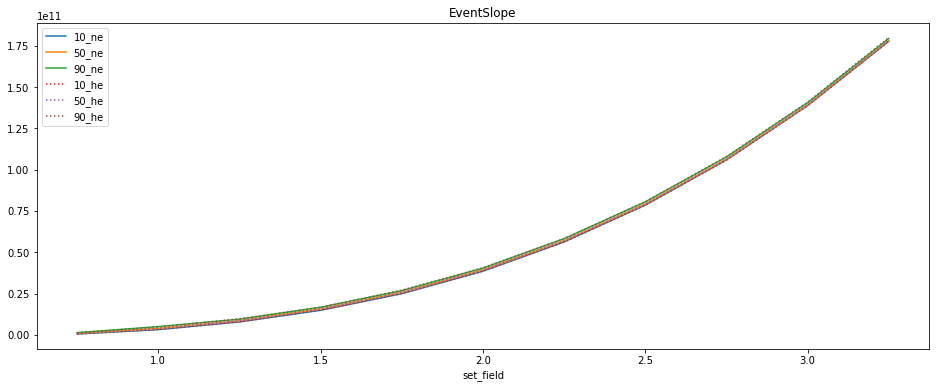

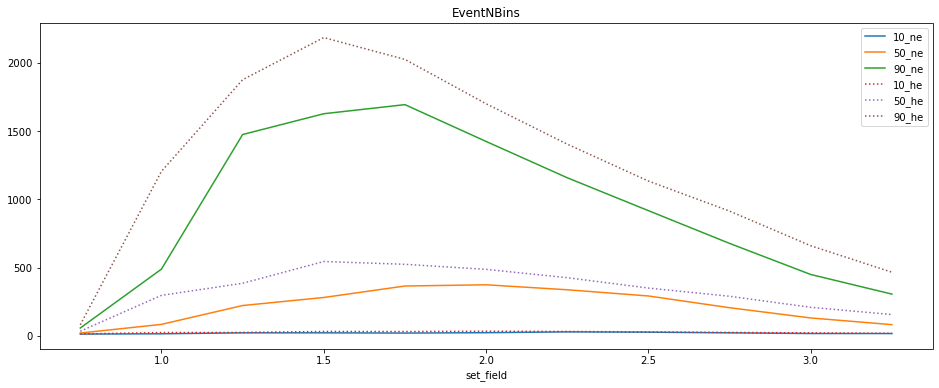

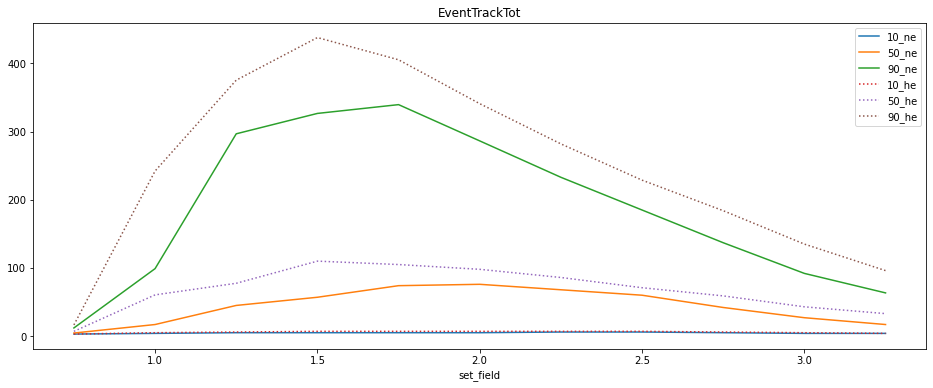

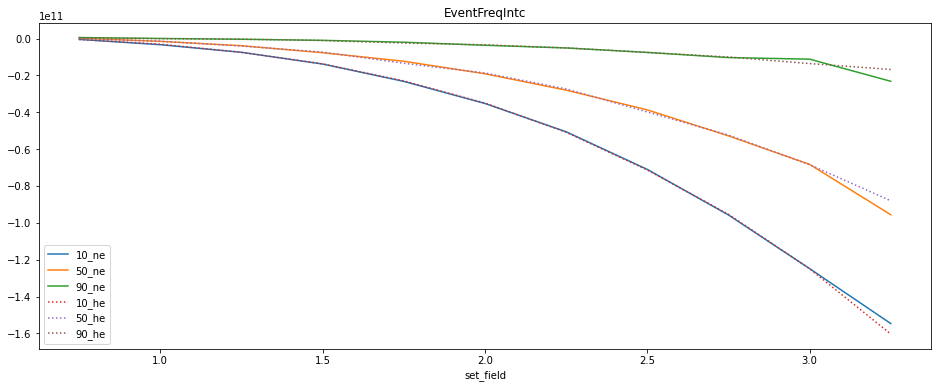

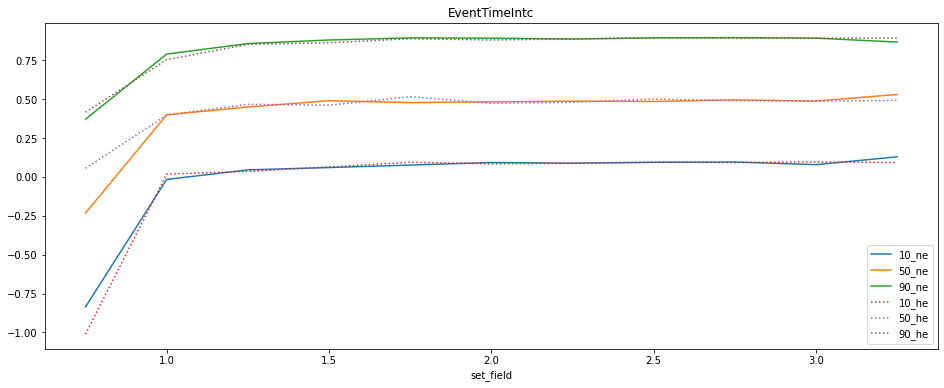

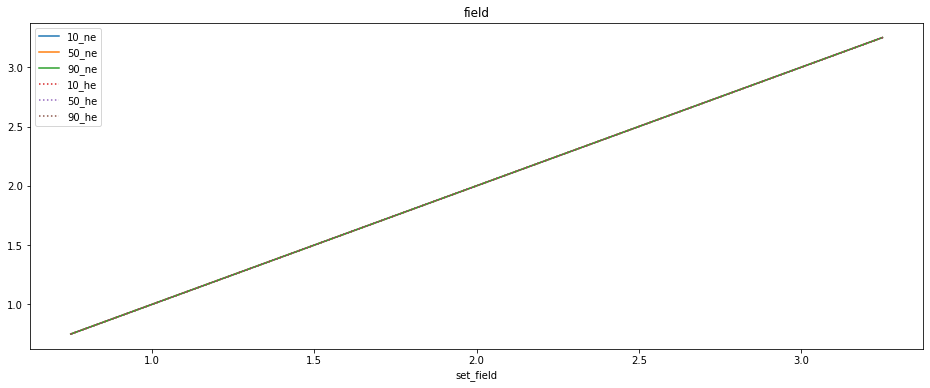

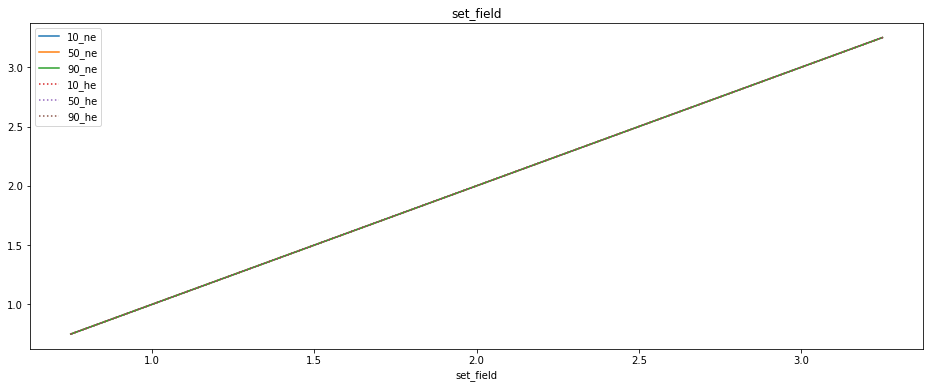

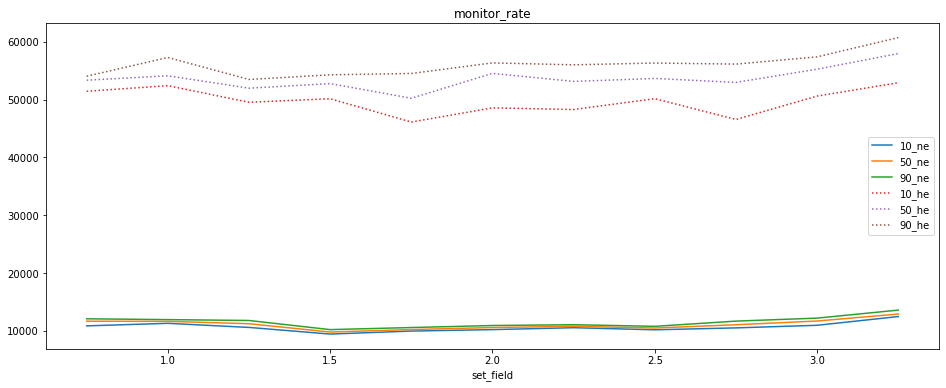

In [204]:
%matplotlib inline
# 90th Percentile
def q10(x):
    return x.quantile(0.1)

# 50th Percentile
def q50(x):
    return x.quantile(0.5)

# 90th Percentile
def q90(x):
    return x.quantile(0.9)
aggs = [q10, q50, q90]
col_names = ["10", "50", "90"]

ne_col_names = [col_name + "_ne" for col_name in col_names]
he_col_names = [col_name + "_he" for col_name in col_names]
orig_col_names = ["q" + col_name for col_name in col_names]
print(ne_col_names, he_col_names, orig_col_names)
# ne_cols = dict(zip(keys, values))

cuts = {"EventStartFreq": ((100)*1e6, (800)*1e6), "EventNBins": (0, np.inf), "EventTimeLength": (0.000, np.inf), 
       "EventStartTime":(0.0,np.inf), 
       "EventTimeIntc": (-1.5, np.inf)}
             
# for agg in aggs
for column in ne.events.columns: 
    
    fig0, ax0 = plt.subplots(figsize=(16,6))
    re.cut_df(ne.events, cuts).groupby("set_field")[column].agg(aggs).rename(columns = dict(zip(orig_col_names, ne_col_names))).plot(ax = ax0)
    re.cut_df(he.events, cuts).groupby("set_field")[column].agg(aggs).rename(columns = dict(zip(orig_col_names, he_col_names))).plot(ax = ax0, ls = "dotted")
    plt.title(f"{column}")
    plt.legend()
    plt.show()
    

## Looking at scatter plots of event properties. 

In [214]:
%matplotlib widget
set_fields = sorted(he.events['set_field'].unique().tolist())

plt.rcParams['figure.dpi']= 100
@interact
def scatter_plots(
    field = widgets.Select(options = set_fields,  description='set_field: '),
    column_1 = widgets.Select(options = he.events.columns,value = 'EventStartTime', description='x_col: '),
    column_2 = widgets.Select(options = he.events.columns,value = 'EventStartFreq', description='y_col: '),
    mrk_sz = widgets.FloatSlider(value=.4, min=0,max=1.0,step=1e-2),
    alpha = widgets.FloatSlider(value=.5, min=0.0,max=1.0,step=1e-2), 
    frac_pts = widgets.FloatSlider(value=0.02,min=0.0,max=1.0,step=1e-2), 
    bins = widgets.IntSlider(value=200,min=50,max=700,step=10),
    fix_field = widgets.Checkbox(
    value=False,
    description='fix field',
    disabled=False,
    indent=False
), 
    isotope = widgets.Select(options = experiment.keys(),value = 'ne', description='isotope ')
):
    
    plt.close("all")
    cuts = {"EventStartFreq": (100e6, 1200e6), "EventNBins": (0, np.inf), 
       "EventTimeIntc": (-1.5, np.inf)}
    
    scatt_settings={
            "figsize": (12, 4),
            "colors": ["b", "r", "g", "c", "m", "k"],
            "hist_bins": bins,
            "markersize": mrk_sz,
            "alpha": alpha,
        }
    
    
    experiment["ne"].scatter("events", column_1, column_2, cuts = cuts, fix_field = fix_field, field_value = field, scatt_settings = scatt_settings)
    
    # experiment["he"].scatter("events", column_1, column_2, cuts = cuts, fix_field = fix_field, field_value = field, scatt_settings = scatt_settings)

interactive(children=(Select(description='set_field: ', options=(0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2…

In [181]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def dbscan_clustering( df, features: list, eps: float, min_samples: int):

    # Normalize features.
    X_norm = StandardScaler().fit_transform(df[features])
    # Compute DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_norm)
    labels = db.labels_

    return labels


def cluster_tracks(tracks, eps=0.005, min_samples=1, features=["EventTimeIntc"], fields = [.75,1.0,1.25,1.5]):
    """Notes: 
        * This is really clustering events not track segments. 
        * Default up to 1/24/23 was .003 up to now. 
        * On 1/24/23 1600, Drew is testing how .005 performs. 
    """

    exp_tracks_copy = tracks.copy()
    # exp_tracks_copy["event_label"] = 100

    for i, (name, group) in enumerate(
        exp_tracks_copy.groupby(["run_id", "file_id"])
    ):
        
        print(f"\nClustering: run_id: {name[0]},  file_id: {name[1]}")

        condition = (exp_tracks_copy.run_id == name[0]) & (
            exp_tracks_copy.file_id == name[1] & 
            exp_tracks_copy.set_field.isin(fields)
        )
        if condition.sum() ==0: 
            print("nope")
            continue
        
        print(f"Tracks in file: {condition.sum()}")
        print(f"Fraction of total tracks in dataset: {condition.mean()}")

        exp_tracks_copy.loc[condition, "event_label"] = dbscan_clustering(
            exp_tracks_copy[condition],
            features=list(features),
            eps=eps,
            min_samples=min_samples,
        )
    exp_tracks_copy["EventID"] = exp_tracks_copy["event_label"] + 1

    return exp_tracks_copy

In [182]:
tracks_clustered = cluster_tracks(ne.events, eps = .1)
events = tracks_clustered.groupby(["run_id", "file_id", "EventID"]).first().reset_index()
    


Clustering: run_id: 492,  file_id: 0
Tracks in file: 1
Fraction of total tracks in dataset: 3.6752545113749126e-05

Clustering: run_id: 492,  file_id: 1
Tracks in file: 1
Fraction of total tracks in dataset: 3.6752545113749126e-05

Clustering: run_id: 492,  file_id: 2
Tracks in file: 1
Fraction of total tracks in dataset: 3.6752545113749126e-05

Clustering: run_id: 492,  file_id: 3
Tracks in file: 1
Fraction of total tracks in dataset: 3.6752545113749126e-05

Clustering: run_id: 492,  file_id: 5
Tracks in file: 1
Fraction of total tracks in dataset: 3.6752545113749126e-05

Clustering: run_id: 492,  file_id: 10
Tracks in file: 1
Fraction of total tracks in dataset: 3.6752545113749126e-05

Clustering: run_id: 492,  file_id: 12
Tracks in file: 1
Fraction of total tracks in dataset: 3.6752545113749126e-05

Clustering: run_id: 492,  file_id: 13
Tracks in file: 1
Fraction of total tracks in dataset: 3.6752545113749126e-05

Clustering: run_id: 492,  file_id: 17
Tracks in file: 1
Fraction of 

<AxesSubplot:xlabel='set_field'>

<AxesSubplot:xlabel='set_field'>

27209
4743


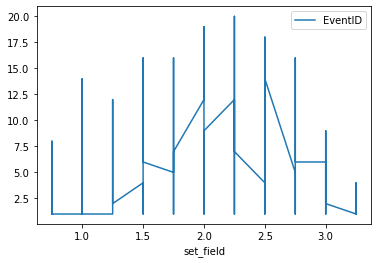

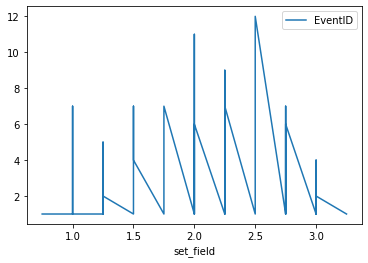

In [186]:
# display(ne.events.describe())
display(ne.events.groupby(["run_id", "file_id", "set_field"]).EventID.count().reset_index().plot(y= "EventID", x = "set_field"))
display(events.groupby(["run_id", "file_id", "set_field"]).EventID.count().reset_index().plot(y= "EventID", x = "set_field"))
print(ne.events.groupby(["run_id", "file_id"]).EventID.count().reset_index().EventID.sum())
print(events.groupby(["run_id", "file_id"]).EventID.count().reset_index().EventID.sum())

In [ ]:
events.

In [201]:
%matplotlib widget

plt.rcParams['figure.dpi']= 100

isotope = 'he'
@interact
def analysis_viz(
    run_id = widgets.Select(options = experiment[isotope].run_ids, description='run_id: '),
    file_id = widgets.Select(options = experiment[isotope].file_ids, description='file_id: '),
    events = widgets.Checkbox(True, description='events'),
    tracks = widgets.Checkbox(False, description='tracks'),
    sparse = widgets.Checkbox(False, description='sparse_spec'),
    EventID = widgets.IntSlider(value=1,min=1,max=20,step=1),
    mrk_sz = widgets.FloatSlider(value=.08,min=0,max=10.0,step=1e-1),
    event_alpha = widgets.FloatSlider(value=1.0,min=0.0,max=1.0,step=1e-2), 
    ss_alpha = widgets.FloatSlider(value=.3,min=0.0,max=1.0,step=1e-2),
    frac_pts = widgets.FloatSlider(value=.7,min=0.0,max=1.0,step=1e-2),
    # isotope = widgets.Select(options = experiment.keys() ,  description='isotope: ', value = 'he'),
    # cut = widgets.Select(options = snr_cuts,  description='snr cut: ', value = 9)
):
    
    cuts = {"EventStartFreq": (100e6, 1200e6), "EventNBins": (100, np.inf)}
    
    config = {"tracks": {"show": tracks,  "alpha": event_alpha, "EventIDs":[]}, 
              "events": {"show": events, "alpha": event_alpha, "cuts": cuts}, 
              "sparse_spec": {"show": sparse, "frac_pts": frac_pts,  "alpha": ss_alpha, "mrk_sz": mrk_sz}}
    
    
    experiment[isotope].visualize(run_id, file_id, config)


interactive(children=(Select(description='run_id: ', options=(373, 374, 375, 376, 377, 380, 381, 382, 383, 384…

## 2. Define functions to build a spectrum. 

02/02/23: 
    * Am I doing the normalization of the monitor correctly? I'm going slowly through this and then working on incorporating this into the snr tests. (here: http://localhost:8888/lab/tree/He6CRES/rocks_analysis_notebooks/ne19_snr_test_01202023.ipynb)

In [18]:
cuts = {"EventStartFreq": (100e6, 1200e6), "EventNBins": (0, np.inf)}

def cut_df(events, cuts): 
    
    events_cut = events.copy()

    for column, cut in cuts.items():
        events_cut = events_cut[(events_cut[column] > cut[0]) & (events_cut[column] < cut[1])]
        
    return events_cut

def build_normalization(root_files): 
    
    condition = (root_files.root_file_exists ==True)
    normalization = root_files[condition].groupby(["run_id", "file_id"])[["monitor_rate", "set_field"]].first().reset_index()
    
    return normalization

def build_spectrum(events, root_files, cuts): 
    """ Builds the field-wise normalized spectrum from the events and root_files dfs. 
    Example cuts: cuts = {"EventStartFreq": (100e6, 1200e6), "EventNBins": (0, np.inf)}
    Document right asap
    """
    
    # Collect all valid events.
    valid_events = cut_df(events, cuts)
    
    # Build a normalization df that contains the monitor rate for each existing root file.
    normalization = build_normalization(root_files)

    # Count the number of events per file.
    event_counts = valid_events.groupby(["run_id", "file_id"]).EventID.count().to_frame("event_count").reset_index()
    
    # Merge the above with the normalization df. 
    spec1 = pd.merge(normalization, event_counts, how = "left", left_on = ["run_id", "file_id"], right_on = ["run_id", "file_id"])
    spec1.fillna(0, inplace = True)

    # Now sum over set field, getting total counts per field and the total monitor_rate.
    # Note that this DOES correctly account for files with zero events, as their monitor_rate is still summed.
    spec2 = spec1.groupby(["set_field"])[["event_count", "monitor_rate"]].sum().reset_index()
    
    # Now that the summation has been done, rename the monitor rate column.
    spec2 = spec2.rename(columns={'monitor_rate':'tot_monitor_rate'})
    
    # Now also count the number of total files you have for each field. 
    spec3 = spec1.groupby(["set_field"]).event_count.count().to_frame("seconds_of_data").reset_index()
    
    # Merge those two dfs
    spec4 = pd.merge(spec2, spec3, how = "inner", left_on = ["set_field"], right_on = ["set_field"])
    
    # Define the normed (mean = 1) tot_mon_rate.
    spec4["normed_tot_monitor_rate"] = spec4["tot_monitor_rate"] / spec4["tot_monitor_rate"].mean()
    
    # Use this norm 1 array to adjust the counts seen.
    spec4["mon_adjusted_count"] = spec4["event_count"]/spec4["normed_tot_monitor_rate"]
    
    # Assign a root N uncertainty to the array using the actual number of observed events.
    spec4["mon_adjusted_count_uncert"] =  spec4["event_count"]**.5
    
    
    return spec4


In [19]:
def plot_spectrum(spectrum_df, ax, label, norm = False, color = 'tab:blue' ): 
    
    x = spectrum_df["set_field"]
    y_mean = spectrum_df["mon_adjusted_count"]
    error = 0.5*spectrum_df["mon_adjusted_count_uncert"]
    
    if norm: 
        y_mean = y_mean / spectrum_df["mon_adjusted_count"].mean()
        error = error / spectrum_df["mon_adjusted_count"].mean()
        
    lower = y_mean - error
    upper = y_mean + error

    # Draw plot with error band and extra formatting to match seaborn style
    ax.plot(x, y_mean, label= label, color = color, marker='.', markersize = 15, ls = '' )
    ax.plot(x, lower, color=color, alpha=0.1)
    ax.plot(x, upper, color=color, alpha=0.1)
    ax.fill_between(x, lower, upper, alpha=0.2)
    
    ax.set_ylabel('monitor adjusted counts')
    if norm: 
        ax.set_ylabel('relative rate')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    return None



## 3. Make an interactive display of the spectra 

Notes: 

* He: 377, 388, 381 had currupt files. 
* Ne: 522 the track/event reconstruction didn't work despite there being tracks present. 

In [20]:
he.root_files = he.root_files[~he.root_files.run_id.isin([377,380, 381])]
he.events = he.events[~he.events.run_id.isin([377,380, 381])]

ne.root_files = ne.root_files[~ne.root_files.run_id.isin([522])]
ne.events = ne.events[~ne.events.run_id.isin([522])]

In [21]:
ne.events.columns

Index(['run_id', 'file_id', 'EventID', 'EventStartTime', 'EventEndTime',
       'EventStartFreq', 'EventEndFreq', 'EventTimeLength', 'EventFreqLength',
       'EventTrackCoverage', 'EventMeanSNR', 'EventSlope', 'EventNBins',
       'EventTrackTot', 'EventFreqIntc', 'EventTimeIntc', 'field', 'set_field',
       'monitor_rate'],
      dtype='object')

In [22]:
%matplotlib inline

set_fields = sorted(he.events['set_field'].unique().tolist())

plt.rcParams['figure.dpi']= 100
@interact
def scatter_plots(
    EventMeanSNR = widgets.FloatSlider(value=.4, min=0,max=1.0,step=1e-2, description = "EventMeanSNR"),
    EventStartFreq = widgets.FloatSlider(value=175, min=0,max=1200,step=1, description = "EventStartFreq (MHz)"),
    show_he = widgets.Checkbox(
    value=True,
    description='show_6he',
    disabled=False,
    indent=False
),
    show_ne = widgets.Checkbox(
    value=True,
    description='show_19ne',
    disabled=False,
    indent=False
),
    norm = widgets.Checkbox(
    value=False,
    description='norm',
    disabled=False,
    indent=False
)
):
    plt.close("all")
    # print("\nHe:\n")
    he_spectrum = re.build_spectrum(he.events, he.root_files, cuts = {"EventStartFreq": (EventStartFreq*1e6, 1200e6), "EventNBins": (0, np.inf)})
    # print("\nNe:\n")
    ne_spectrum = re.build_spectrum(ne.events, ne.root_files, cuts = {"EventStartFreq": (EventStartFreq*1e6, 1200e6), "EventNBins": (0, np.inf)})
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    if show_he: 
        plot_spectrum(he_spectrum,ax, label = "6he",   norm = norm, color = 'tab:blue')
    if show_ne:
        plot_spectrum(ne_spectrum,ax, label = "19ne",  norm = norm, color = 'tab:red')
    
    ax.set_title("Preliminary Spectrum")
    ax.legend()

    plt.show()
    
    # print("\nHe:\n")
    # display(he_spectrum) 
    # print("\nNe:\n")
    # display(ne_spectrum) 
    # he_spectrum.
    

interactive(children=(FloatSlider(value=0.4, description='EventMeanSNR', max=1.0, step=0.01), FloatSlider(valu…

In [17]:
ne.events.columns

Index(['run_id', 'file_id', 'EventID', 'EventStartTime', 'EventEndTime',
       'EventStartFreq', 'EventEndFreq', 'EventTimeLength', 'EventFreqLength',
       'EventTrackCoverage', 'EventMeanSNR', 'EventSlope', 'EventNBins',
       'EventTrackTot', 'EventFreqIntc', 'EventTimeIntc', 'field', 'set_field',
       'monitor_rate'],
      dtype='object')

# Working on making .py files to make plots of important things. 

## Histogram study. 

* Generically have ability to get chisq distance between the two groups given a given feature!
* Seperately make a plot of ne and he features across all fields. 

In [19]:
cols = ne.events.columns.to_list()
cols.remove('set_field')
cols

['run_id',
 'file_id',
 'EventID',
 'EventStartTime',
 'EventEndTime',
 'EventStartFreq',
 'EventEndFreq',
 'EventTimeLength',
 'EventFreqLength',
 'EventTrackCoverage',
 'EventMeanSNR',
 'EventSlope',
 'EventNBins',
 'EventTrackTot',
 'EventFreqIntc',
 'EventTimeIntc',
 'field',
 'monitor_rate']

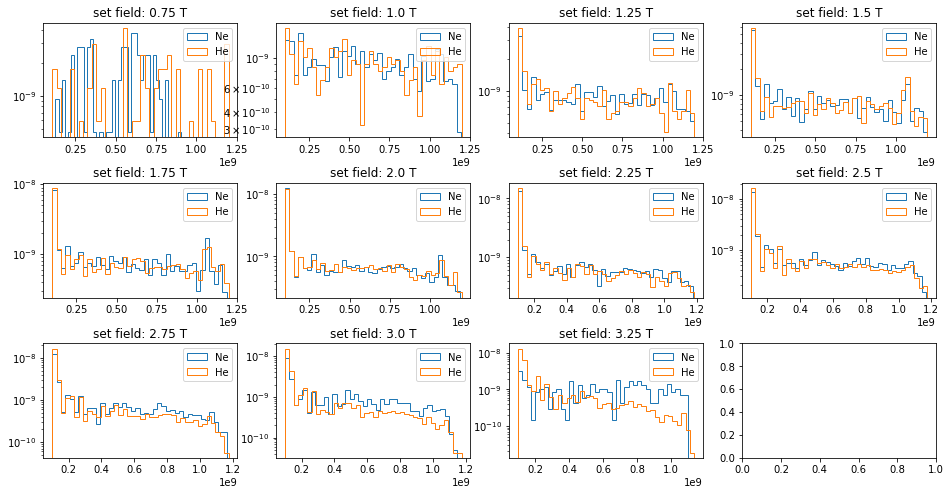

In [143]:
%matplotlib inline


# def 
# df = ne.events
nrows = 3
feature = "EventStartFreq"
yscale = "log"
bins = 40
path = "/media/drew/T7 Shield/rocks_analysis/paper_02_figures/histograms"
plot_index = 0

fig_path = path + f"/hist_{feature}_{plot_index}.png"

grouped_ne = ne.events.groupby('set_field')
grouped_he = he.events.groupby('set_field')
rowlength = int(np.ceil(grouped_ne.ngroups/3))                     # fix up if odd number of groups
fig, axs = plt.subplots(figsize=(16,8), 
                        nrows=3, ncols=rowlength,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

targets = zip(grouped_ne.groups.keys(),  axs.flatten())

for i, (key, ax) in enumerate(targets):

    ax.hist(grouped_ne.get_group(key)[feature], bins=bins, 
                   histtype=u'step', density=True, label = "Ne")
    ax.hist(grouped_he.get_group(key)[feature], bins=bins, 
                   histtype=u'step', density=True, label = "He")
    ax.set_title(f"set field: {key} T")
    ax.set_yscale(yscale)
    ax.legend()
    # ax.tight_layout()

# fig_path = 
# plt.savefig(fig_path_1, bbox_inches='tight', dpi = 300)
plt.show()

In [31]:
he.tracks.columns

Index(['run_id', 'file_id', 'root_file_path', 'field', 'monitor_rate',
       'UniqueID', 'Bits', 'Component', 'AcquisitionID', 'TrackID', 'EventID',
       'EventSequenceID', 'IsCut', 'StartTimeInRunC', 'StartTimeInAcq',
       'EndTimeInRunC', 'TimeLength', 'StartFrequency', 'EndFrequency',
       'FrequencyWidth', 'Slope', 'SlopeChange', 'Intercept', 'TotalPower',
       'NTrackBins', 'TotalTrackSNR', 'MaxTrackSNR', 'TotalTrackNUP',
       'MaxTrackNUP', 'TotalWideTrackSNR', 'TotalWideTrackNUP',
       'StartTimeInRunCSigma', 'EndTimeInRunCSigma', 'TimeLengthSigma',
       'StartFrequencySigma', 'EndFrequencySigma', 'FrequencyWidthSigma',
       'SlopeSigma', 'InterceptSigma', 'TotalPowerSigma', 'FreqIntc',
       'TimeIntc', 'MeanTrackSNR', 'set_field', 'TimeIntc_mean',
       'TimeIntc_std', 'TimeLength_mean', 'TimeLength_std', 'Slope_mean',
       'Slope_std'],
      dtype='object')

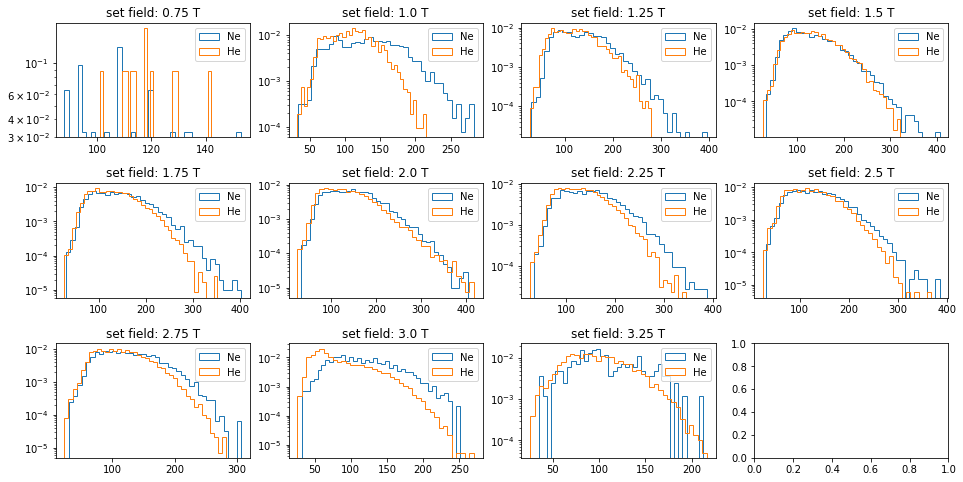

In [29]:
%matplotlib inline


# def 
# df = ne.events
nrows = 3
feature = "TotalPower"
yscale = "log"
bins = 40
path = "/media/drew/T7 Shield/rocks_analysis/paper_02_figures/histograms"
plot_index = 0

fig_path = path + f"/hist_{feature}_{plot_index}.png"

grouped_ne = ne.tracks.groupby('set_field')
grouped_he = he.tracks.groupby('set_field')
rowlength = int(np.ceil(grouped_ne.ngroups/3))                     # fix up if odd number of groups
fig, axs = plt.subplots(figsize=(16,8), 
                        nrows=3, ncols=rowlength,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

targets = zip(grouped_ne.groups.keys(),  axs.flatten())

for i, (key, ax) in enumerate(targets):

    ax.hist(grouped_ne.get_group(key)[feature], bins=bins, 
                   histtype=u'step', density=True, label = "Ne")
    ax.hist(grouped_he.get_group(key)[feature], bins=bins, 
                   histtype=u'step', density=True, label = "He")
    ax.set_title(f"set field: {key} T")
    ax.set_yscale(yscale)
    ax.legend()
    # ax.tight_layout()

# fig_path = 
# plt.savefig(fig_path_1, bbox_inches='tight', dpi = 300)
plt.show()

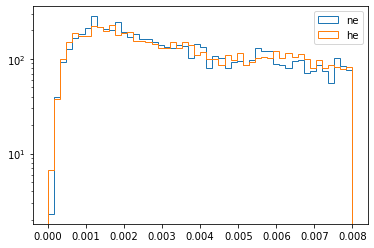

In [100]:
plt.close("all")
# condition = 
ne_counts,_,_ = plt.hist(ne.events.EventTimeLength[ne.events.set_field == 2.5], bins=50, 
                   histtype=u'step', density=True, label = "ne", range = (0,.008) )
he_counts,_,_ = plt.hist(he.events.EventTimeLength[he.events.set_field == 2.5], bins=50, 
                   histtype=u'step', density=True, label = "he", range = (0,.008))

plt.legend()

plt.yscale("log")
plt.show()

# Trying to figure out how to quantitatively compare two samples to see if they come from the same population.  

* Look at the KS test. This is what we want. 
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
* Really useful discussion: https://stats.stackexchange.com/questions/496693/using-chi2-distance-for-histogram-comparison-with-0-valued-elements-leads-to

In [107]:
ks = stats.kstest(ne.events.EventTimeLength[ne.events.set_field == 2.0], he.events.EventTimeLength[he.events.set_field == 2.0])
ks.pvalue

0.15849181878689156

In [104]:
from scipy import stats
rng = np.random.default_rng()
stats.kstest(stats.uniform.rvs(size=100, random_state=rng),
             stats.norm.cdf)

KstestResult(statistic=0.503100643002699, pvalue=5.9602726554821935e-24)

# Looking at noise floor for He and Ne 

* One thing is that I need to add more stuff to the events features. Add a TotalNoise for tracks and bring it to events... 
* Investigating the noise floors for the two tests. 
* 

In [32]:
def construct_GV_array(rootfile_path, gainvar_num_spectra):
    # Open rootfile.
    rootfile = uproot4.open(rootfile_path)
    GV_array = rootfile["histGV_{}_0;1".format(gainvar_num_spectra)]._bases[1]._data
    return GV_array


In [39]:
he_root_file = "/media/drew/T7 Shield/rocks_analysis/saved_experiments/he6_full_0_aid_1/root_files/Freq_data_2022-08-17-20-29-17_001.root"
ne_root_file = "/media/drew/T7 Shield/rocks_analysis/saved_experiments/ne19_full_0_aid_2/root_files/Freq_data_2022-10-05-19-27-55_002.root"

In [40]:
he_noise = construct_GV_array(he_root_file, gainvar_num_spectra = 50000)
ne_noise = construct_GV_array(ne_root_file, gainvar_num_spectra = 50000)

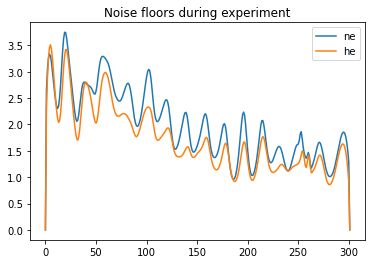

In [44]:
plt.plot(ne_noise, label = "ne")
plt.plot(he_noise, label = "he")
plt.title("Noise floors during experiment")
plt.legend()
plt.show()